In [1]:
### This is a gene specific analysis notebook
from candidate_utils import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Gene-transcript dict
dict_name = pickle.load(open(os.path.join(dir_refs,'dict_name_forcov_062121.pkl'), 'rb'))

In [4]:
gene_name = 'ZFP69'

In [5]:
# Find transcript for the gene
for transcript,gene in dict_name.items():
    if gene == gene_name:
        print(transcript)

ENST00000372706


<span style="color:blue">**The histology subtypes of patients with the mutation**</span>.


In [6]:
df_str, df_num = get_num_str(gene_name)

/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [11]:
df_str.loc['syn', 'tumour_histological_type']

"{'Liposarcoma': 1}"

In [8]:
df_num

SV.events  Coding.SNVs  Non.coding.SNVs  \
mut_status                                                    
syn        count     1.000000     1.000000         1.000000   
           mean    531.000000    38.000000      3470.000000   
           std            NaN          NaN              NaN   
           min     531.000000    38.000000      3470.000000   
           25%     531.000000    38.000000      3470.000000   
           50%     531.000000    38.000000      3470.000000   
           75%     531.000000    38.000000      3470.000000   
           max     531.000000    38.000000      3470.000000   
all        count    19.000000    19.000000        19.000000   
           mean    996.157895    51.842105      5196.421053   
           std     556.927111    30.481804      2846.234692   
           min     318.000000     6.000000       803.000000   
           25%     578.500000    35.000000      3538.500000   
           50%     872.000000    45.000000      4946.000000   
           75%    1232.000000    62.000000      6094.500000   
           max    2064.000000   146.000000     11571.000000   

                  CNA.events..do_not_use.  Retrotransposon.insertions  \
mut_status                                                              
syn        count                 1.000000                    1.000000   
           mean               1138.000000                   10.000000   
           std                        NaN                         NaN   
           min                1138.000000                   10.000000   
           25%                1138.000000                   10.000000   
           50%                1138.000000                   10.000000   
           75%                1138.000000                   10.000000   
           max                1138.000000                   10.000000   
all        count                19.000000                   19.000000   
           mean               2105.263158                    3.684211   
           std                1211.467468                    3.019430   
           min                 727.000000                    0.000000   
           25%                1235.000000                    1.000000   
           50%                1711.000000                    4.000000   
           75%                2485.500000                    6.000000   
           max                5141.000000                   10.000000   

                  Mitochondrial.mutations  all.Indels  
mut_status                                             
syn        count                 1.000000    1.000000  
           mean                  1.000000  116.000000  
           std                        NaN         NaN  
           min                   1.000000  116.000000  
           25%                   1.000000  116.000000  
           50%                   1.000000  116.000000  
           75%                   1.000000  116.000000  
           max                   1.000000  116.000000  
all        count                19.000000   19.000000  
           mean                  2.631579  257.368421  
           std                   2.629122  161.442185  
           min                   0.000000   15.000000  
           25%                   1.000000  156.000000  
           50%                   2.000000  232.000000  
           75%                   3.000000  261.000000  
           max                   9.000000  691.000000

<span style="color:blue">**Mutation**</span>.


In [9]:
df_all, df_mut, donor_list = get_mut(gene_name)

Total 19 patients
1 patients have synonymous mutations, they are: ['DO219968']
1:g.40961323C>G
1:g.40961446C>T


/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [12]:
df_all.loc[pd.IndexSlice[gene_name, :,donor_list],'Genome_Change']

Hugo_Symbol  Variant_Classification  Donor_ID
SH3BGR       Silent                  DO52136     g.chr21:40834315G>A
                                     DO46747     g.chr21:40834462C>T
Name: Genome_Change, dtype: object

<span style="color:blue">**CNV**</span>.


In [11]:
cnv = get_cnv(donor_list, gene_name)

                               18ec066e-8510-4921-9e35-45d85fb01e38
Gene Symbol Locus ID Cytoband                                      
ITPR2       3709     12p12.1                                    2.0
                               1c188bf5-2c99-4eb4-a774-59c75d53e643
Gene Symbol Locus ID Cytoband                                      
ITPR2       3709     12p12.1                                    2.0


<span style="color:blue">**Expression PCAWG**</span>.


/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Number of normal patient: 0
Number of synonymous patients: 0
Number of other tumor patients:0


ValueError: min() arg is an empty sequence

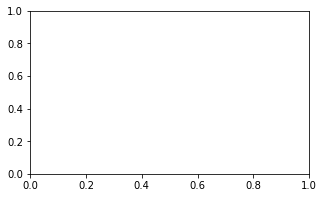

In [12]:
get_expression(gene_name)

<span style="color:blue">**CRISPR**</span>.


In [13]:
get_lineage(gene_name, 'Liposarcoma')

[]


8 in histology subtype
981 not in histology subtype
test statistic:1928.0,    p-value:0.0066
test statistic:3414.0,    p-value:0.2633


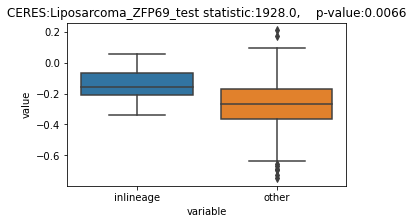

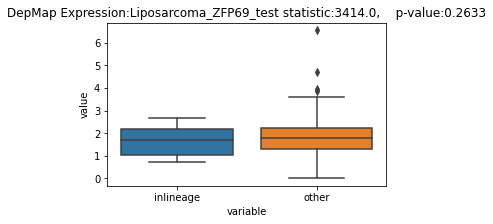

In [14]:
# def get_CERES(gene, lineage):
#     dir_depmap = './depmap'
#     df_depmap = pd.read_csv(os.path.join(dir_depmap, gene+'_21Q2.csv'))
#     df_depmap.columns = ['ID', 'CERES', 'Name', 'Primary Disease', 'Lineage', 'Lineage Subtype', 'Mutation']

#     df_gene = df_depmap[df_depmap['Lineage Subtype'] == lineage]
#     print(f'{len(df_gene)} in histology subtype')
#     df_other = df_depmap[df_depmap['Lineage Subtype'] != lineage]
#     print(f'{len(df_other)} not in histology subtype')
#     df_all = pd.DataFrame({'inlineage':df_gene['CERES'],
#                           'other':df_other['CERES']})
#     df_all = df_all.melt()

#     fig,ax = plt.subplots(figsize=(5,3))
#     ax = sns.boxplot(x = 'variable', y = 'value', data = df_all)

#     mannwhitneyu(df_gene['CERES'], df_other['CERES'])
#     text = f'test statistic:{round(mannwhitneyu(df_gene["CERES"], df_other["CERES"])[0],4)},\
#     p-value:{round(mannwhitneyu(df_gene["CERES"], df_other["CERES"])[1],4)}'
#     print(text)
#     ax.set_title('CERES:'+lineage+'_'+gene+'_'+text)
    
#     # Expression
#     df_all_exp = pd.DataFrame({'inlineage':df_gene['Expression'],
#                       'other':df_other['Expression']})
#     df_all_exp = df_all_exp.melt()
#     fig,ax = plt.subplots(figsize=(5,3))
#     ax = sns.boxplot(x = 'variable', y = 'value', data = df_all_exp)

#     mannwhitneyu(df_gene['Expression'], df_other['Expression'])
#     text = f'test statistic:{round(mannwhitneyu(df_gene["Expression"], df_other["Expression"])[0],4)},\
#     p-value:{round(mannwhitneyu(df_gene["Expression"], df_other["Expression"])[1],4)}'
#     print(text)
#     ax.set_title('DepMap Expression:'+lineage+'_'+gene+'_'+text)
get_CERES(gene_name, 'Liposarcoma')

<span style="color:blue">**Alternative Splicing**</span>  

In [21]:
dir_splice = '../../anno_ref/ICGC/alternative_splicing'
exp_dir = '../../anno_ref/ICGC/pcawg_rnaseq/'
# Read aliquot id information
df_exp_info = pd.read_csv(os.path.join(exp_dir,'rnaseq.metadata.tsv'), sep = '\t')

In [16]:
### If patient is in the splicing file(transcriptome analysis info)
for donor in donor_list:
    tumor_id = df_exp_info[df_exp_info['icgc_donor_id'] == donor]['aliquot_id']
    if len(tumor_id) ==0:
        print(f'{donor} is not in PCAWG transcriptome analysis')

DO50345 is not in PCAWG transcriptome analysis
DO50326 is not in PCAWG transcriptome analysis
DO50387 is not in PCAWG transcriptome analysis
DO50401 is not in PCAWG transcriptome analysis
DO50337 is not in PCAWG transcriptome analysis
